In [42]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import LeaveOneOut
from sklearn import metrics    # contains all the effectivness idexes 
import pandas as pd    # for the dataset
from matplotlib import pyplot as plt
from statistics import mean
import numpy as np

#### getting the dataset

In [43]:
labels = ['class', 'spec_number', 'eccentr', 'asp_ratio', 'elong', 'solidity', 'stoch_conv', 'iso_factor', 'max_ind_depth', 'lobedness', 'av_intensity', 'av_contr', 'smooth', 'third_mom', 'unif', 'entropy']

df = pd.read_csv(r'./leaf/leaf.csv', header = None, names = labels)
display(df)

,class,spec_number,eccentr,asp_ratio,elong,solidity,stoch_conv,iso_factor,max_ind_depth,lobedness,av_intensity,av_contr,smooth,third_mom,unif,entropy
0,1,6,0.72997,1.4892,0.34284,0.98755,1.00000,0.84482,0.004945,0.004451,0.010487,0.058528,0.003414,0.001125,0.000025,0.34068
1,35,9,0.91707,2.6504,0.63359,0.96002,0.99298,0.53972,0.012062,0.026481,0.101210,0.184330,0.032861,0.008966,0.001415,1.79790
2,9,14,0.55112,1.2821,0.39683,0.88375,0.99649,0.49492,0.030576,0.170150,0.062015,0.146210,0.020930,0.006369,0.000677,1.26590
3,25,6,0.78310,1.5389,0.42639,0.94648,0.97544,0.65478,0.038706,0.272660,0.126070,0.244690,0.056492,0.023259,0.000668,1.85040
4,14,8,0.94058,3.0366,0.69248,0.93952,0.99474,0.42979,0.031219,0.177380,0.038691,0.107600,0.011445,0.003216,0.000248,1.08430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,30,4,0.55518,1.2318,0.25226,0.94783,0.99123,0.54965,0.015115,0.041582,0.059148,0.139960,0.019211,0.005734,0.000421,1.35790
336,23,5,0.56840,1.1876,0.48001,0.91247,0.79474,0.38850,0.089162,1.446900,0.027113,0.101820,0.010261,0.003789,0.000107,0.65567
337,23,10,0.63548,1.2020,0.47365,0.89373,0.86842,0.44347,0.077616,1.096400,0.022403,0.103860,0.010672,0.005084,0.000031,0.48911
338,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785


In [44]:
t = tree.DecisionTreeClassifier()

x = df.iloc[:, 1:16]
y = df.iloc[:, 0]

In [40]:
# initializing a first tree

# min_sample_split is the minimum number of observations allowed in a node to perform a split
# criterion is the index used while splitting to find the best branch
# min_impurity_decrease is minimum amount of impurity decrease after a split allowed to perform a split

t_first = tree.DecisionTreeClassifier(min_samples_split=2, criterion='gini', min_impurity_decrease=0.)

In [49]:
# using grid search to find the best hyperparameters and initializing the tree

grid_param = {'criterion': ['gini', 'entropy'], 'min_samples_split': np.array(range(2, 8))}
t = GridSearchCV(tree.DecisionTreeClassifier(), grid_param, cv=5, scoring='accuracy')
t.fit(x, y)
print(t.best_params_)

{'criterion': 'entropy', 'min_samples_split': 6}


#### first attempt to fit a tree

In [41]:
t_first.fit(x, y)

DecisionTreeClassifier()

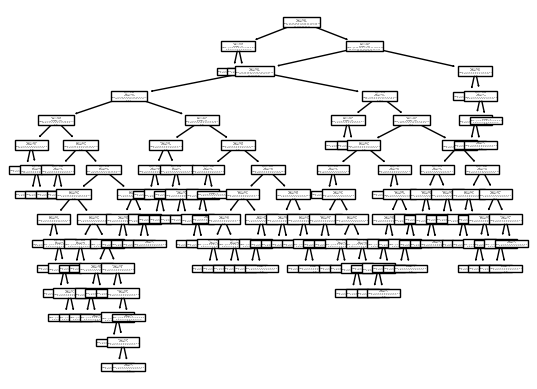

In [10]:
tree.plot_tree(t_first)
plt.savefig("tree", dpi=1000)

In [11]:
# prints effectiveness (should be maximum because min_sample_split=2)

print(t_first.score(x, y))

1.0


#### evaluation of the technique using cross validation

In [5]:
# names of all effectivness indexes available in sklearn

# note that roc_auc doesn't work in cv because it is a multiclass classification (we need to specify
# ovo or ovr) and that all roc_auc variants don't work in loocv because the testing sets contain
# only one observation

print(metrics.get_scorer_names())

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'top_k_accuracy', 

In [50]:
# k-fold cross validation

k = 5

effect_cv = cross_validate(t, x, y, cv=k, scoring=('accuracy', 'roc_auc_ovo', 'roc_auc_ovr'))

print(mean(effect_cv['test_accuracy']))
print(mean(effect_cv['test_roc_auc_ovo']))
print(mean(effect_cv['test_roc_auc_ovr']))

0.6176470588235294
0.8129501915708812
0.8129533103712209


In [51]:
effect = cross_validate(t, x, y, cv = )

print(effect)

0.5970588235294118
